# Titanic Survivor Classifier
This is exercise 3 from Chapter 3 of the ML textbook.

For those who don't know what the Titanic is, or perhaps are only familiar with the Titanic from Dr. Who, the Titanic was a ship that set sail from Southampton on April 12, 1912 setting sail for New York but sank in the North Atlantic Ocean on April 15, 1912. The ship was deemed unsinkable, but it hit a large iceberg which caused serious damage to the ship which led to its sinking. As there were not enough lifeboats on the ship, almost 2/3<sup>rds</sup> of the passengers on board.

With that said, we want to create a classifier that can predict whether or not a passenger survived given a set of potential predictor variables, and perhaps analyze the most pertinent factors which led to these passengers' survival/fatalities. Let's start by looking at the variables:

| Variable Name | Description | Key |
| :------------ | :---------- | :-- |
| `survival` | Survival | 0 = No, 1 = Yes |
| `pclass` | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| `sex` | Sex of passenger |  |
| `Age` | Age of passenger in years | |
| `sibsp` | Number of siblings/spouses aboard the Titanic | |
| `parch` | Number of parents/children aboard the Titanic | |
| `ticket` | Ticket number | |
| `fare` | Passenger fare | |
| `cabin` | Cabin number | |
| `embarked` | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

Let's look at the distribution of the variables in our dataset, but wait, we have to load the data first and import the packages necessary for analyzing this dataset:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

print(train.keys())
print(test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [2]:
# See the first few rows of the training set
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Defining the training set predictor variables
X_train = train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
# Defining the training set target variable
y_train = train[["Survived"]]

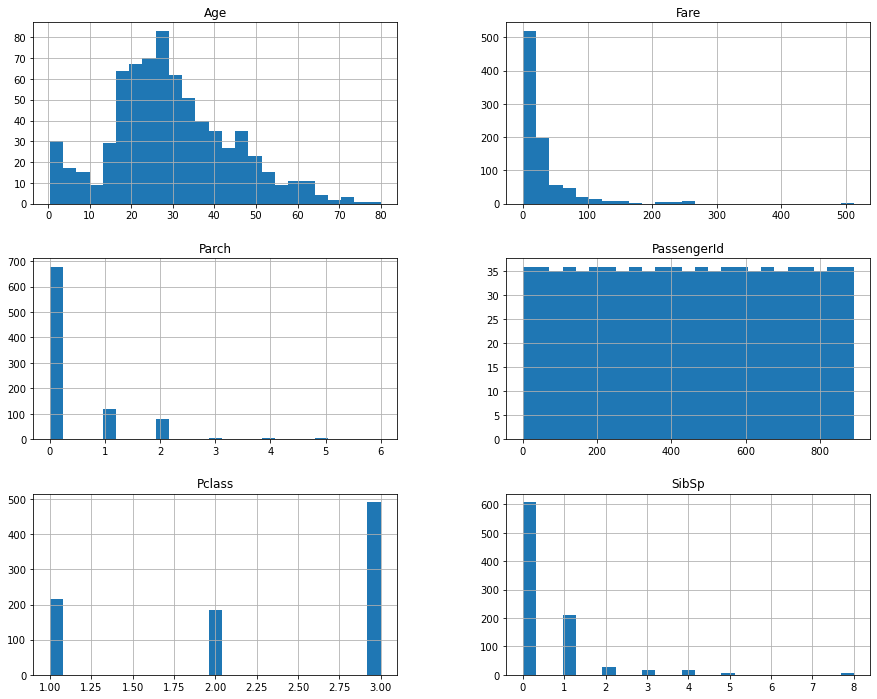

In [5]:
# Let's look at some distributions, first of the numerical distributions
X_train.hist(bins = 25, figsize = (15, 12))
plt.show()

In [6]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What do we see:
1. The distribution of the passenger's ages appears to be right skewed. The mean/median of these distributions is far the the left of the distribution. There is a large amount of passengers who are younger children (see spike on the right), so we may want to make sure that children get an indicator of some sort. We also see that based on the description, the ages of some 177 people are missing. We probably want to look at this a bit later and try impute the ages.
2. We see that most of the passengers are riding in 3<sup>rd</sup> class/steerage. Given the year of this tragedy, this probably meant most of the 3<sup>rd</sup> (and likely the 2<sup>nd</sup>), did not survive.
3. We see that most of the passengers paid low fares, which probably negatively correlates with the class passengers on the Titanic. We will keep that in mind when analyzing this data (**covariate plot**).
4. Most the people on board did not have children or parents on board (right skewed). We may want to use this as an indicator instead, but for now, we will keep this as is.
5. That being said, a larger portion of the passengers did travel accompanied by a spouse or sibling compared to parents/children, but the distribution is still heavily right skewed.

We also want to deal with the categorical data in our dataset and convert it to numerical data so that it can be used in whatever model we selected. First let's look at some counts of these categorical variables:

In [7]:
X_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

We have way more males than females on the RMS Titanic:

In [8]:
X_train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
113056      1
382651      1
240929      1
345778      1
17463       1
Name: Ticket, Length: 681, dtype: int64

Odd variable, not sure if this should be used in our model unless this is somehow indicative of something else (cabin type, number of people on the same ticket, etc.). However, this may be captured by some covariates, so I won't touch it yet.

In [9]:
X_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
D21            1
C106           1
C32            1
D15            1
E68            1
Name: Cabin, Length: 147, dtype: int64

Similar to the tickets, not entirely sure if this will be relevant, so I won't touch that either at the moment. Maybe we could create indicators for people who have large amounts of people assigned to a cabin (similar thought for tickets).

In [10]:
X_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Let's see some correlations
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [12]:
corr_matrix["Fare"].sort_values(ascending = False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

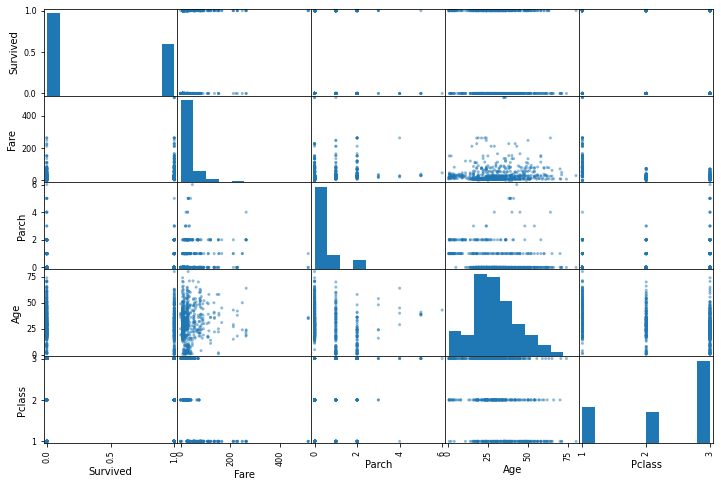

In [13]:
attribs = ["Survived", "Fare", "Parch", "Age", "Pclass"]
pd.plotting.scatter_matrix(train[attribs], figsize = (12, 8))
plt.show()

In [14]:
X_train_cat = X_train[["Sex", "Embarked", "Pclass"]]
X_train_cat_pc_ohe = pd.get_dummies(X_train_cat.Pclass.astype(str))
X_train_cat_sex_ohe = pd.DataFrame(X_train_cat.Sex.str.get_dummies())
X_train_cat_em_ohe = pd.DataFrame(X_train_cat.Embarked.str.get_dummies())

In [15]:
X_train_cat_em_ohe = X_train_cat_em_ohe.rename(columns = {"S": "Southampton", 
                                                          "C": "Cherbourg",
                                                          "Q": "Queenstown"})
X_train_cat_em_ohe

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [16]:
X_train_cat_pc_ohe = X_train_cat_pc_ohe.rename(columns = {"1": "First",
                                                         "2": "Second",
                                                         "3": "Third"})
X_train_cat_pc_ohe

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [17]:
X_train_cat = pd.concat([X_train_cat_em_ohe,
                         X_train_cat_sex_ohe,
                        X_train_cat_pc_ohe], axis = 1)
X_train_cat

,Cherbourg,Queenstown,Southampton,female,male,First,Second,Third
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,0,0,1,1,0,1,0,0
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,1,0
887,0,0,1,1,0,1,0,0
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


Let's start working with the numerical data. We should note that `Pclass` is a categorical variable that was numeric, so it was converted above.

In [18]:
# Let's start working with the numerical data
X_train_num = X_train[['Age', 'SibSp', 'Parch', 'Fare']]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer

num_pipeline = Pipeline([
    ("num_imputer", KNNImputer(n_neighbors=5, weights="distance")),
    ("scaler", StandardScaler())
])

X_train_num_tr = num_pipeline.fit_transform(X_train_num)
X_train_num_tr

array([[-0.58713784,  0.43279337, -0.47367361, -0.50244517],
       [ 0.58705273,  0.43279337, -0.47367361,  0.78684529],
       [-0.2935902 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.22789026,  0.43279337,  2.00893337, -0.17626324],
       [-0.2935902 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.14673127, -0.4745452 , -0.47367361, -0.49237783]])

In [20]:
cat_pipeline = Pipeline([
   ("cat_imputer", SimpleImputer(strategy = "most_frequent")),
   ("encoder", OneHotEncoder())
])

X_train_cat = X_train[["Sex", "Embarked", "Pclass"]]
X_train_cat_tr = cat_pipeline.fit_transform(X_train_cat)
X_train_cat_tr.shape

(891, 8)

Okay, the numeric pipeline seems to work. Let's add the categorical transformation.

In [21]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ["Sex", "Embarked", "Pclass"]

# Create a pipeline that can deal with all of these attributes
full_pipeline = ColumnTransformer([
    ("numeric", num_pipeline, num_attribs),
    ("categorical", cat_pipeline, cat_attribs)
])

# Prepare the housing_data
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.shape

(891, 12)

In [22]:
X_train_prepared

array([[-0.58713784,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58705273,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2935902 , -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.22789026,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.2935902 , -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.14673127, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

Looks like our training set worked!

### Let's make a model!


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import binom, randint

forest_clf = RandomForestClassifier(random_state=0)

param_dist =  dict(n_estimators = randint(low = 50, high = 400),
                  max_depth = binom(n = 24, p = 0.5))

forest_search = RandomizedSearchCV(forest_clf, param_distributions=param_dist, n_iter = 200,
                                 cv = 5, scoring = "accuracy", verbose = 2, n_jobs = 3)

forest_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.8s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   22.5s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:   53.4s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:  2.7min finished
/home/evan/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=200, n_jobs=3,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f73b95cdcd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f73d5c24b20>},
                   scoring='accuracy', verbose=2)

In [24]:
# Let's see the results of our models' training
rf_results = forest_search.cv_results_

for acc, params in zip(rf_results["mean_test_score"][:10], rf_results["params"][:10]):
    print("Accuracy:", acc, params)
    
print(forest_search.best_score_, forest_search.best_estimator_)

Accuracy: 0.8047203565375682 {'max_depth': 17, 'n_estimators': 280}
Accuracy: 0.8204506936162199 {'max_depth': 11, 'n_estimators': 359}
Accuracy: 0.817079907099366 {'max_depth': 12, 'n_estimators': 255}
Accuracy: 0.8226853304877284 {'max_depth': 11, 'n_estimators': 89}
Accuracy: 0.8193208210407382 {'max_depth': 12, 'n_estimators': 202}
Accuracy: 0.8215680120519743 {'max_depth': 11, 'n_estimators': 75}
Accuracy: 0.8170736300295023 {'max_depth': 12, 'n_estimators': 190}
Accuracy: 0.8249325214989642 {'max_depth': 11, 'n_estimators': 114}
Accuracy: 0.8114619295712762 {'max_depth': 15, 'n_estimators': 165}
Accuracy: 0.8080848659845584 {'max_depth': 14, 'n_estimators': 69}
0.8339212855439081 RandomForestClassifier(max_depth=8, n_estimators=221, random_state=0)


So, we only reach 82.9% accuracy. Not fantastic for an ensemble model...

Let's try a logistic regression model and a SVM.

In [26]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon

logistic_clf = LogisticRegression(random_state=0)

log_param_dist = dict(C = expon(scale = 1), 
                      penalty = ["elasticnet"],
                      solver = ["saga"],
                      l1_ratio = [0, .25, .50, .75, 1.])

log_search = RandomizedSearchCV(logistic_clf, param_distributions=log_param_dist, n_iter = 200,
                                 cv = 5, scoring = "accuracy", verbose = 2, n_jobs = 3)

log_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 178 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    7.6s finished
/home/evan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=200, n_jobs=3,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f73b8824100>,
                                        'l1_ratio': [0, 0.25, 0.5, 0.75, 1.0],
                                        'penalty': ['elasticnet'],
                                        'solver': ['saga']},
                   scoring='accuracy', verbose=2)

In [27]:
log_results = log_search.cv_results_

for acc, params in zip(log_results["mean_test_score"][:10], log_results["params"][:10]):
    print("Accuracy:", acc, params)
    
print(log_search.best_score_, log_search.best_estimator_)

Accuracy: 0.7980101688531794 {'C': 0.4182091869194073, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7980038917833155 {'C': 0.3487157245629605, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7980101688531793 {'C': 0.7432221312837455, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7957692549118072 {'C': 0.4148306092424976, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7833783190006904 {'C': 0.0330645012764414, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7957692549118072 {'C': 0.4201801770477599, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7980038917833155 {'C': 0.38245014787445836, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7923921913250894 {'C': 0.16594559204155074, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.7991149331492059 {'C': 0.0553041871407181, 'l1_ratio': 0, 'penalt

In [28]:
# SVM Model
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)

svc_param_dist = dict(C = expon(loc = 1, scale = 1.0),
                     kernel = ["linear", "poly", "rbf"],
                     gamma = ["scale", "auto"])

svc_search = RandomizedSearchCV(svm_clf, param_distributions=svc_param_dist, n_iter = 200,
                                 cv = 5, scoring = "accuracy", verbose = 2, n_jobs = 3)

svc_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 178 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    6.8s finished
/home/evan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5, estimator=SVC(random_state=0), n_iter=200, n_jobs=3,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f73ae86d4f0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='accuracy', verbose=2)

In [29]:
svc_results = svc_search.cv_results_

for acc, params in zip(svc_results["mean_test_score"][:10], svc_results["params"][:10]):
    print("Accuracy:", acc, params)
    
print(svc_search.best_score_, svc_search.best_estimator_)

Accuracy: 0.7878601468834348 {'C': 1.053524906537541, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.827154604230745 {'C': 1.0219678178402458, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8215805661917017 {'C': 1.5742270258035438, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.8148703785073128 {'C': 1.3125468501709827, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.7878601468834348 {'C': 4.36617857574418, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8181909484652564 {'C': 2.8537256615372106, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.7878601468834348 {'C': 4.234081702512195, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7878601468834348 {'C': 2.3638643242747, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7878601468834348 {'C': 1.1772098981942434, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8215554579122466 {'C': 3.8263234935385295, 'gamma': 'scale', 'kernel': 'rbf'}
0.8338899001945892 SVC(C=1.0882788024102852, random_state=0)


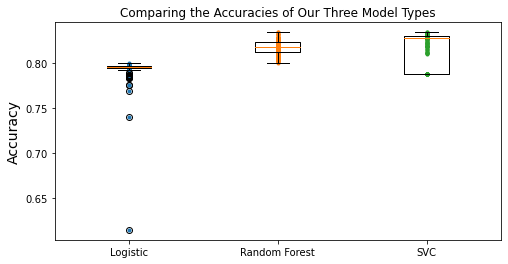

In [30]:
logistic_scores = np.array(log_results["mean_test_score"])
log_scores = logistic_scores[np.logical_not(np.isnan(logistic_scores))]
rf_scores = np.array(rf_results["mean_test_score"])
svc_scores = np.array(svc_results["mean_test_score"])

plt.figure(figsize=(8, 4))
plt.plot([1]*len(log_scores), log_scores, ".")
plt.plot([2]*len(rf_scores), rf_scores, ".")
plt.plot([3]*len(svc_scores), svc_scores, ".")
plt.boxplot([log_scores, rf_scores, svc_scores], labels=("Logistic","Random Forest", "SVC"))
plt.title("Comparing the Accuracies of Our Three Model Types")
plt.ylabel("Accuracy", fontsize=14)
plt.show()

So, we topped out at around 80% accuracy for all of our models. That is not bad for a first crack. I'll come back later to try to improve the models used and perhaps use better attributes. For now, let's just produce the predictions on the test set:

In [35]:
# Process the test data
X_test_prepared = full_pipeline.transform(test)

# Use our best model parameters
best_log = LogisticRegression(**log_search.best_params_)
best_rforest = RandomForestClassifier(**forest_search.best_params_)
best_svc = SVC(**svc_search.best_params_)

# Fit the models
best_log.fit(X_train_prepared, y_train)
best_rforest.fit(X_train_prepared, y_train)
best_svc.fit(X_train_prepared, y_train)

# Create our three sets of predictions
log_test_preds = best_log.predict(X_test_prepared)
rf_test_preds  = best_rforest.predict(X_test_prepared)
svc_test_preds = best_svc.predict(X_test_prepared)

/home/evan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-35-6773ecf37d72>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rforest.fit(X_train_prepared, y_train)
/home/evan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
print(log_test_preds[:5], rf_test_preds[:5], svc_test_preds[:5])

[0 0 0 0 1] [0 0 0 0 0] [0 1 0 0 0]
